In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

Importá la base de datos.

In [93]:
df = pd.read_excel('Databases/1. Generales - Original.xlsx')

Definí las variables independientes y las dependientes. Al ser un modelo ordinal, la variable dependiente debe ser ordinal, o sea, debe tener categorías que pueden ser ordenadas jerárquicamente, como calificaciones (por ejemplo, "mala", "regular", "buena") o niveles de satisfacción (por ejemplo, "insatisfecho", "neutral", "satisfecho") 

In [94]:
# Variables a explicar.
Variables_Dependientes = ['cercania_Massa', 
                          #'cercania_Milei', 
                          #'cercania_Bregman', 
                          #'cercania_Bullrich', 
                          #'cercania_Schiaretti'
                          ]

# Variables que influyen en las otras.
Variables_Todas = [
                            'genero',
                             'edad',
                            'nacionalidad',
                            'provincia',
                            'e_social',
                            'niv_educativo',
                            'voto_2019',
                            'voto_PASO_2023',
                            'candidato_PASO_2023',
                            'autopercep_izq-der',
                            'autopercep_conpro',
                            'autopercep_perantiper',
                            'indice_positividad',
                            'massa_ip_izqder',
                            'massa_ip_conpro',
                             'bullrich_ip_izqder',
                             'bullrich_ip_conpro',
                            'schiaretti_ip_izqder',
                             'schiaretti_ip_conpro',
                            'milei_ip_izqder',
                            'milei_ip_conpro',
                            'bregman_ip_izqder',
                            'bregman_ip_conpro',
                            'indice_progresismo',
                            'indice_conservadurismo'
                            ]

In [95]:
Variables_Massa = [
    'voto_2019',
    'autopercep_perantiper',
    'massa_ip_conpro',
    'indice_conservadurismo',
    'massa_ip_izqder',
    'edad',
    'autopercep_conpro',
    'indice_progresismo',
    'autopercep_izq-der',
    'indice_positividad',
    'candidato_PASO_2023',
    'schiaretti_ip_conpro',
    'schiaretti_ip_izqder'
]

In [96]:
Variables_Schiaretti = [
    'schiaretti_ip_conpro',
    'bullrich_ip_izqder',
    'indice_conservadurismo',
    'provincia',
    'massa_ip_izqder',
    'schiaretti_ip_izqder',
    'candidato_PASO_2023',
    'voto_2019',
    'indice_progresismo'
]

In [97]:
Variables_Independientes = Variables_Massa

In [98]:
X = df[Variables_Independientes]
y = df[Variables_Dependientes]

In [99]:
# Convert categorical independent variables to numerical using LabelEncoder.
for Column in Variables_Independientes:
    if X[Column].dtype == 'object':
        X[Column] = LabelEncoder().fit_transform(X[Column])

C:\Users\tomas\AppData\Local\Temp\ipykernel_14160\3576202961.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[Column] = LabelEncoder().fit_transform(X[Column])
C:\Users\tomas\AppData\Local\Temp\ipykernel_14160\3576202961.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[Column] = LabelEncoder().fit_transform(X[Column])


In [100]:
# Split the data into training and testing sets
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# Initialize the Decision Tree Regressor
Decision_Tree_Model = DecisionTreeRegressor(random_state=42)

In [102]:
# Fit the model
Decision_Tree_Model.fit(X_Train, y_Train)

DecisionTreeRegressor(random_state=42)

In [103]:
# Make predictions
y_Predictions = Decision_Tree_Model.predict(X_Test)

# Evaluate the model
Mean_Squared_Error = mean_squared_error(y_Test, y_Predictions)
R_Squared_Score = r2_score(y_Test, y_Predictions)

# Print evaluation metrics
print(f'Mean Squared Error: {Mean_Squared_Error:.4f}.')
print(f'R-squared Score: {R_Squared_Score:.4f}.')

Mean Squared Error: 1.5634.
R-squared Score: 0.1635.


In [104]:
# Extract feature importances
Feature_Importances = Decision_Tree_Model.feature_importances_

In [105]:
# Create a DataFrame to display the feature importances
Importance_df = pd.DataFrame({
    'Feature': Variables_Independientes,
    'Importance': Feature_Importances
})

In [106]:
# Sort the DataFrame by importance
Importance_df = Importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(Importance_df)

                   Feature  Importance
0                voto_2019    0.384253
1    autopercep_perantiper    0.119064
2          massa_ip_conpro    0.065130
3   indice_conservadurismo    0.064985
4          massa_ip_izqder    0.060328
7       indice_progresismo    0.057169
5                     edad    0.054962
6        autopercep_conpro    0.045116
8       autopercep_izq-der    0.039955
10     candidato_PASO_2023    0.029819
11    schiaretti_ip_conpro    0.028444
9       indice_positividad    0.026080
12    schiaretti_ip_izqder    0.024695


Las variables están ordenadas según su importancia. 

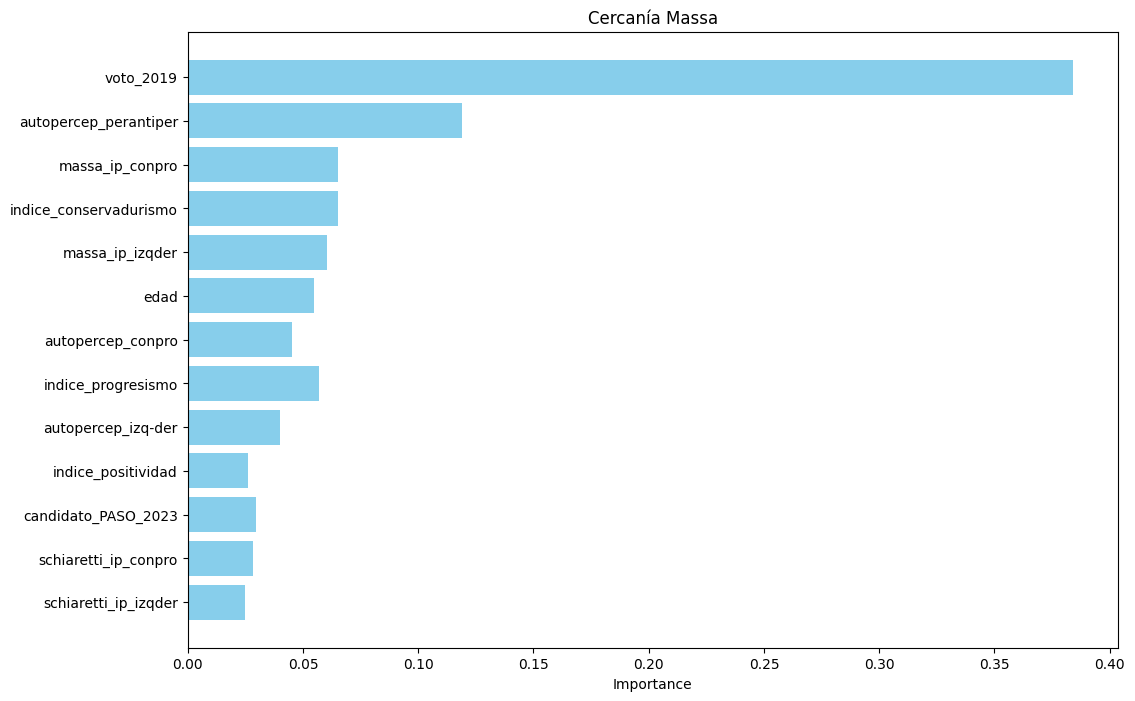

In [108]:
import matplotlib.pyplot as plt

# Gráfico de barras
plt.figure(figsize=(12, 8))
plt.barh(Variables_Independientes, Feature_Importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Cercanía Massa')
plt.gca().invert_yaxis()  # Invertir el eje y para que la variable más importante esté arriba
plt.show()